In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
amd = pd.read_csv('data/amd.csv')
arm = pd.read_csv('data/arm.csv')
nvda = pd.read_csv('data/nvda.csv')
spx = pd.read_csv('data/spx.csv')
spy = pd.read_csv('data/spy.csv')
tsm = pd.read_csv('data/tsm.csv')
txn = pd.read_csv('data/txn.csv')

In [4]:
amd.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/03/2014,4.24,22521690,4.36,4.40,4.14
1,07/07/2014,4.26,21165500,4.23,4.31,4.21
2,07/08/2014,4.22,41601520,4.25,4.30,4.10
3,07/09/2014,4.23,18458970,4.21,4.29,4.20
4,07/10/2014,4.29,39243940,4.18,4.36,4.14


In [5]:
stockpanel = pd.DataFrame(index=amd.index)

In [6]:
stockpanel['amd'] = amd['Open'].shift(-1) - amd['Open']
stockpanel['arm'] = arm['Open'].shift(-1) - arm['Open']
stockpanel['nvda'] = nvda['Open'].shift(-1) - nvda['Open']
stockpanel['spx'] = spx['Open'].shift(-1) - spx['Open']
stockpanel['spy'] = spy['Open'].shift(-1) - spy['Open']
stockpanel['tsm'] = tsm['Open'].shift(-1) - tsm['Open']
stockpanel['txn'] = txn['Open'].shift(-1) - txn['Open']
stockpanel['Price'] = amd['Open']

In [7]:
print(stockpanel)

       amd    arm    nvda      spx   spy   tsm   txn   Price
0    -0.13  12.53  0.0092 -1975.88  0.03  0.24  0.15    4.36
1     0.02 -10.68 -0.0057  1984.22 -0.67 -0.21 -0.21    4.23
2    -0.04  -1.70  0.0015    -7.83 -0.42 -0.16  0.54    4.25
3    -0.03  -1.08  0.0010   -11.29 -1.51 -0.24 -0.30    4.21
4     0.12  -3.39  0.0070     1.57  1.00  0.79  0.07    4.18
...    ...    ...     ...      ...   ...   ...   ...     ...
2511 -3.42    NaN -2.0300   -13.99  1.68  1.67 -1.14  160.60
2512  3.05    NaN  0.4800    -2.59  1.79 -0.98  1.48  157.18
2513  1.02    NaN -1.1100    11.78 -1.53  1.43 -0.52  160.23
2514 -4.21    NaN -2.3400    56.13 -1.93 -3.11  1.36  161.25
2515   NaN    NaN     NaN    32.80   NaN   NaN   NaN  157.04

[2516 rows x 8 columns]


In [8]:
stockpanel.tail(100)

,amd,arm,nvda,spx,spy,tsm,txn,Price
2416,0.67,NaN,0.459,3.38,0.74,7.50,1.97,170.33
2417,1.68,NaN,2.067,31.76,2.33,-1.23,1.12,171.00
2418,-4.74,NaN,-2.200,-1.90,-6.64,-5.34,-4.14,172.68
2419,5.53,NaN,2.802,2.25,2.26,1.70,-0.41,167.94
2420,5.67,NaN,0.667,4.04,2.50,1.17,1.05,173.47
...,...,...,...,...,...,...,...,...
2511,-3.42,NaN,-2.030,-13.99,1.68,1.67,-1.14,160.60
2512,3.05,NaN,0.480,-2.59,1.79,-0.98,1.48,157.18
2513,1.02,NaN,-1.110,11.78,-1.53,1.43,-0.52,160.23
2514,-4.21,NaN,-2.340,56.13,-1.93,-3.11,1.36,161.25


In [9]:
stockpanel.isnull().sum()
stockpanel = stockpanel.fillna(method='ffill')
stockpanel.dropna()

,amd,arm,nvda,spx,spy,tsm,txn,Price
0,-0.13,12.53,0.0092,-1975.88,0.03,0.24,0.15,4.36
1,0.02,-10.68,-0.0057,1984.22,-0.67,-0.21,-0.21,4.23
2,-0.04,-1.70,0.0015,-7.83,-0.42,-0.16,0.54,4.25
3,-0.03,-1.08,0.0010,-11.29,-1.51,-0.24,-0.30,4.21
4,0.12,-3.39,0.0070,1.57,1.00,0.79,0.07,4.18
...,...,...,...,...,...,...,...,...
2511,-3.42,-6.58,-2.0300,-13.99,1.68,1.67,-1.14,160.60
2512,3.05,-6.58,0.4800,-2.59,1.79,-0.98,1.48,157.18
2513,1.02,-6.58,-1.1100,11.78,-1.53,1.43,-0.52,160.23
2514,-4.21,-6.58,-2.3400,56.13,-1.93,-3.11,1.36,161.25


In [10]:
stockpanel.isnull().sum()

amd      0
arm      0
nvda     0
spx      0
spy      0
tsm      0
txn      0
Price    0
dtype: int64

In [11]:
import os
path = os.path.abspath("data")

In [12]:
path_save = path + '/stockpanel.csv'
print(path_save)
stockpanel.to_csv(path_save)

/Users/students/PycharmProjects/pythonProject7/data/stockpanel.csv


In [13]:
print(stockpanel.shape)

(2516, 8)


In [14]:
Train = stockpanel.iloc[-1000:, :]
Test = stockpanel.iloc[-2000:-1000, :]
print(Train.shape, Test.shape)
print(Train)

(1000, 8) (1000, 8)
       amd   arm    nvda    spx   spy   tsm   txn   Price
1516 -3.38 -6.58 -0.5200 -24.30 -6.83  0.80 -4.21   56.68
1517  1.66 -6.58  0.3393 -67.80  9.11  1.18  3.64   53.30
1518 -0.28 -6.58 -0.3993  26.60 -2.62 -1.80 -0.58   54.96
1519  0.63 -6.58  0.2105 -54.61  2.09  1.93  2.66   54.68
1520 -0.08 -6.58  0.0488  31.61 -0.45 -0.61  0.69   55.31
...    ...   ...     ...    ...   ...   ...   ...     ...
2511 -3.42 -6.58 -2.0300 -13.99  1.68  1.67 -1.14  160.60
2512  3.05 -6.58  0.4800  -2.59  1.79 -0.98  1.48  157.18
2513  1.02 -6.58 -1.1100  11.78 -1.53  1.43 -0.52  160.23
2514 -4.21 -6.58 -2.3400  56.13 -1.93 -3.11  1.36  161.25
2515 -4.21 -6.58 -2.3400  32.80 -1.93 -3.11  1.36  157.04

[1000 rows x 8 columns]


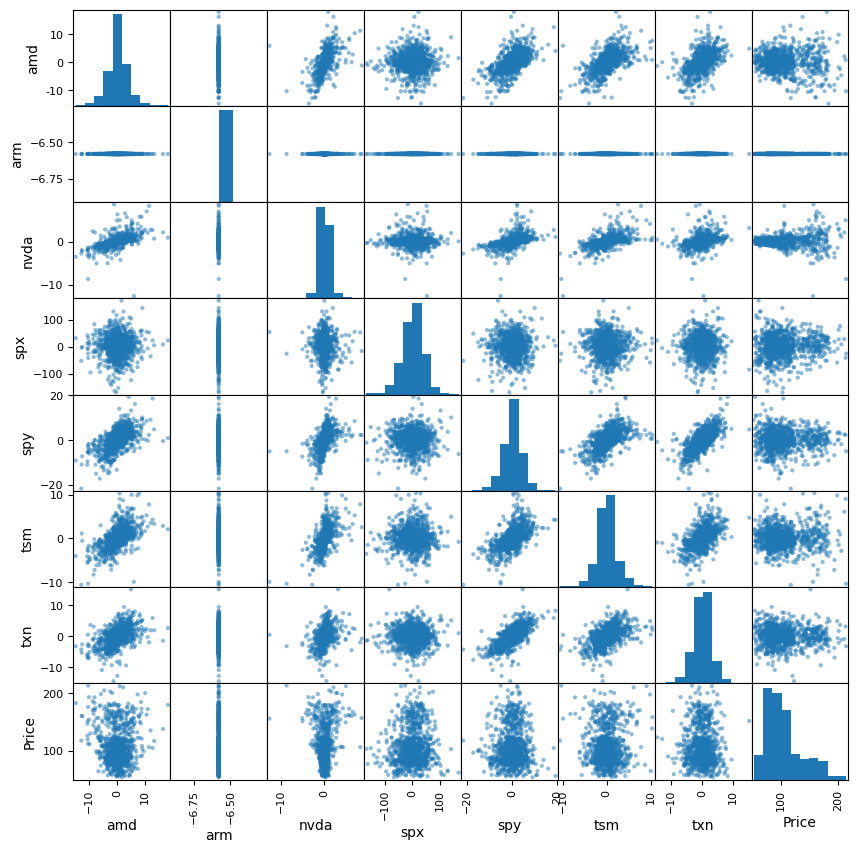

In [15]:
sm = pd.plotting.scatter_matrix(Train, figsize=(10, 10))

In [16]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['amd']
print(corr_array)

amd     1.000000
arm          NaN
nvda    0.567216
spx     0.023501
spy     0.588310
tsm     0.588786
txn     0.509896
Name: amd, dtype: float64


In [17]:
formula = 'amd~arm+nvda+spx+spy+tsm+txn'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    amd   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          5.92e-145
Time:                        08:39:11   Log-Likelihood:                -2345.9
No. Observations:                1000   AIC:                             4704.
Df Residuals:                     994   BIC:                             4733.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0017      0.002     -0.955      0.340      -0.005       0.002
arm            0.0114      0.012      0.955      0.340      -0.012       0.035
nvda           0.7686      0.076     10.132      0.000       0.620       0.917
spx            0.0024      0.002      1.206      0.228      -0.001       0.006
spy            0.1798      0.028      6.445      0.000       0.125       0.235
tsm            0.3223      0.047      6.905      0.000       0.231       0.414
txn            0.1787      0.039      4.618      0.000       0.103       0.255
==============================================================================
Omnibus:                      239.072   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2248.482
Skew:                           0.812   Prob(JB):                         0.00
Kurtosis:                      10.164   Cond. No.                     5.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.52e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

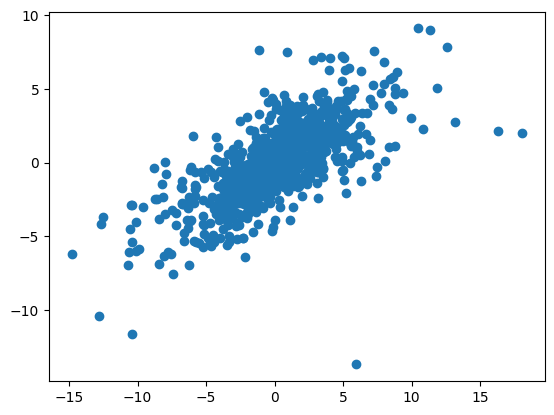

In [19]:
plt.scatter(Train['amd'], Train['PredictedY'])

In [20]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [21]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [22]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 9, 'amd')

,Train,Test
R2,0.490952,1.143101
RMSE,2.539487,0.903287


Profit of Signal-based Strategy

In [23]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

In [24]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['amd'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  1953.0499999999997


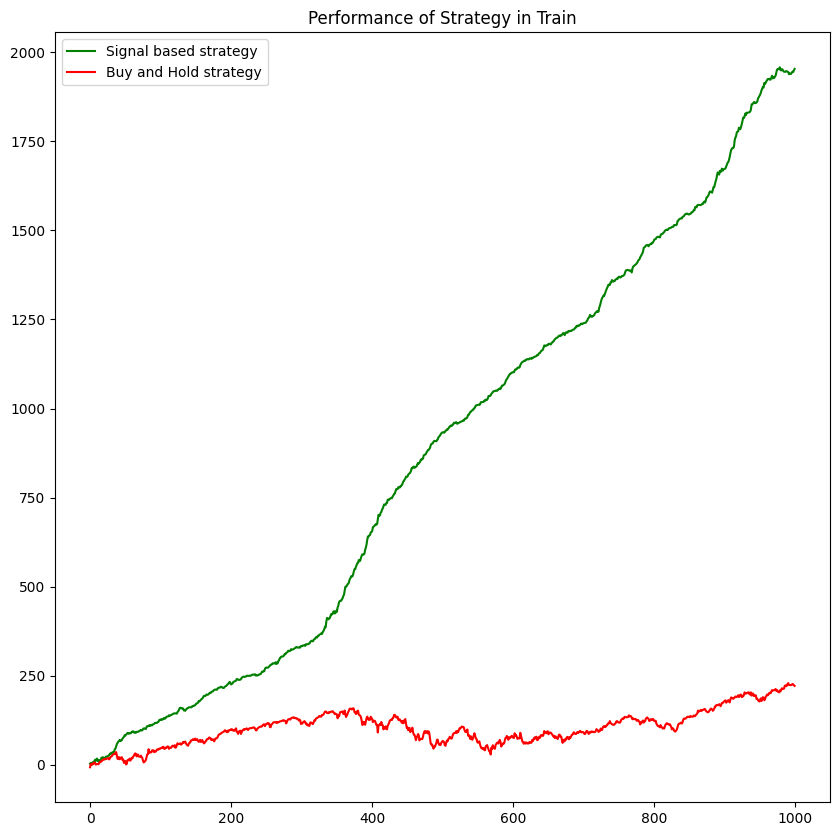

In [25]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [26]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['amd'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  403.45799999999997


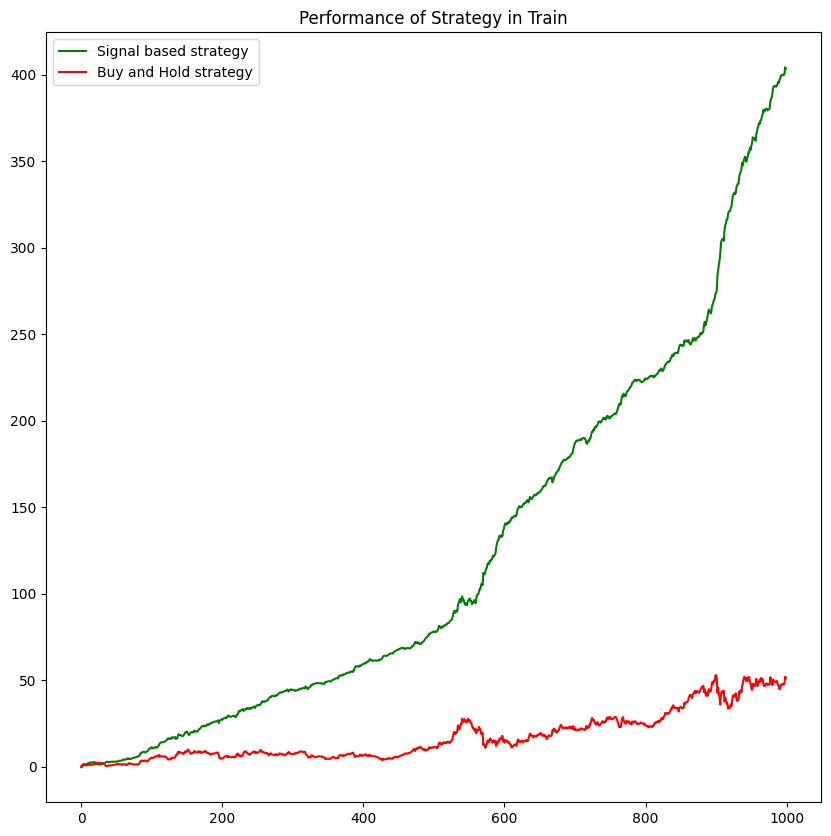

In [27]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['amd'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()